<a href="https://colab.research.google.com/github/inzamamulDU/ML-example/blob/main/data_mining_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_recall_fscore_support,accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 1000)
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#read the dataset
df = pd.read_csv('/content/StockData.csv')
df.head(50)

,CompanyName,Sector,Category,Last Price,NAV,P/E,EPS,Paid up,Dir,Pub,Inst,Foreign,Govt
0,NBL,Bank,A,9.8,18.92,8.31,1.18,30863.20,30.980,47.140,20.730,1.150,0.00
1,NRBCBANK,Bank,N,29.7,18.88,12.53,2.37,199.00,73.320,23.220,3.460,0.000,0.00
2,ABBANK,Bank,B,15.9,34.26,31.80,0.50,8159.37,31.670,41.430,25.440,0.890,0.57
3,IFIC,Bank,A,15.1,19.18,21.57,0.70,16397.70,4.110,39.550,22.870,0.720,32.75
4,RUPALIBANK,Bank,A,33.9,46.1,69.18,0.49,4340.69,0.000,4.980,4.830,0.000,90.19
5,EXIMBANK,Bank,A,13.6,23.66,6.83,1.99,14321.50,37.950,34.570,25.950,1.540,0.00
6,DHAKABANK,Bank,A,16.3,23.69,7.34,2.22,8731.12,40.120,45.990,12.890,0.000,0.00
7,JAMUNABANK,Bank,A,23.3,34.06,6.58,3.54,7691.26,47.940,45.030,6.680,0.350,0.00
8,PREMIERBAN,Bank,A,15.1,23.02,7.09,2.13,10629.70,35.330,43.330,19.750,1.590,0.00
9,STANDBANKL,Bank,A,11.1,18.67,10.28,1.08,10258.90,39.490,37.350,22.690,0.470,0.00


In [ ]:
#see the count and make sure null value occurs or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CompanyName  374 non-null    object 
 1   Sector       374 non-null    object 
 2   Category     374 non-null    object 
 3   Last Price   374 non-null    float64
 4   NAV          374 non-null    object 
 5   P/E          374 non-null    object 
 6   EPS          374 non-null    float64
 7   Paid up      374 non-null    float64
 8   Dir          374 non-null    float64
 9   Pub          374 non-null    float64
 10  Inst         374 non-null    float64
 11  Foreign      374 non-null    float64
 12  Govt         374 non-null    float64
dtypes: float64(8), object(5)
memory usage: 38.1+ KB


In [ ]:
#just do the statisitcal analysis
df.describe()

,Last Price,EPS,Paid up,Dir,Pub,Inst,Foreign,Govt
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,123.026471,2.501818,2174.019920,37.052960,34.756575,21.264484,1.241489,2.791578
std,354.744582,21.737762,3285.313299,19.680636,18.343464,16.283813,4.686357,12.335236
min,7.100000,-126.360000,199.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.325000,0.092500,525.500000,30.000000,20.022500,9.912500,0.000000,0.000000
50%,39.600000,1.130000,1106.595000,34.995000,35.940000,18.400000,0.000000,0.000000
75%,83.675000,2.210000,2005.950000,49.692500,46.892500,26.732500,0.210000,0.000000
max,4478.600000,267.940000,30863.200000,99.030000,84.910000,78.669000,39.780000,90.190000


In [ ]:
#count number of NaN, unique values, type
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

,Missing value,N unique value,dtype
CompanyName,0,374,object
Sector,0,20,object
Category,0,4,object
Last Price,0,312,float64
NAV,0,337,object
P/E,0,339,object
EPS,0,280,float64
Paid up,0,342,float64
Dir,0,304,float64
Pub,0,355,float64


In [ ]:
df.shape

(374, 13)

In [ ]:
# #saw the attribute type has object so couldn't load previous 1 try to replace but failed
# df['P/E'].replace(
#     to_replace= '#DIV/0!',
#     value='0',
#     inplace=True
# )

In [ ]:
# df['NAV'].replace(
#     to_replace= '#VALUE!',
#     value='0',
#     inplace=True
# )

In [ ]:
# #New Build? data type has bool change it to int for easier approach
# df["NAV"] = df["NAV"].astype(float)
# df["P/E"] = df["P/E"].astype(float)

In [ ]:
basic_details(df)

,Missing value,N unique value,dtype
CompanyName,0,374,object
Sector,0,20,object
Category,0,4,object
Last Price,0,312,float64
NAV,0,337,object
P/E,0,339,object
EPS,0,280,float64
Paid up,0,342,float64
Dir,0,304,float64
Pub,0,355,float64


In [ ]:
#convert 'team' column to numeric
df['Category'] = pd.factorize(df['Category'])[0]

In [ ]:
df.head(10)

,CompanyName,Sector,Category,Last Price,NAV,P/E,EPS,Paid up,Dir,Pub,Inst,Foreign,Govt
0,NBL,Bank,0,9.8,18.92,8.31,1.18,30863.20,30.98,47.14,20.73,1.15,0.00
1,NRBCBANK,Bank,1,29.7,18.88,12.53,2.37,199.00,73.32,23.22,3.46,0.00,0.00
2,ABBANK,Bank,2,15.9,34.26,31.80,0.50,8159.37,31.67,41.43,25.44,0.89,0.57
3,IFIC,Bank,0,15.1,19.18,21.57,0.70,16397.70,4.11,39.55,22.87,0.72,32.75
4,RUPALIBANK,Bank,0,33.9,46.1,69.18,0.49,4340.69,0.00,4.98,4.83,0.00,90.19
5,EXIMBANK,Bank,0,13.6,23.66,6.83,1.99,14321.50,37.95,34.57,25.95,1.54,0.00
6,DHAKABANK,Bank,0,16.3,23.69,7.34,2.22,8731.12,40.12,45.99,12.89,0.00,0.00
7,JAMUNABANK,Bank,0,23.3,34.06,6.58,3.54,7691.26,47.94,45.03,6.68,0.35,0.00
8,PREMIERBAN,Bank,0,15.1,23.02,7.09,2.13,10629.70,35.33,43.33,19.75,1.59,0.00
9,STANDBANKL,Bank,0,11.1,18.67,10.28,1.08,10258.90,39.49,37.35,22.69,0.47,0.00


In [ ]:
df =df.drop(['CompanyName'], axis = 1)

In [ ]:
#spliting the dataset into features and target
X=df.drop(['Category'],axis=1)
y=df['Category']

In [ ]:
test_lis = ['Sector', 'NAV', 'P/E']
#increase the attrivute to do astatistical analysis
def descrictive_stat_feat(X):
    df_x = pd.DataFrame(X)
    dcol= [c for c in df_x.columns if df_x[c].nunique()>=1 and c not in test_lis ]
    d_median = df_x[dcol].median(axis=0)
    d_mean = df_x[dcol].mean(axis=0)
    q1 = df_x[dcol].apply(np.float32).quantile(0.25)
    q3 = df_x[dcol].apply(np.float32).quantile(0.75)
    
    #Add mean and median column to data set having more then 10 categories
    for c in dcol:
        X[c+str('_median_range')] = (df_x[c].astype(np.float32).values > d_median[c]).astype(np.int8)
        X[c+str('_mean_range')] = (df_x[c].astype(np.float32).values > d_mean[c]).astype(np.int8)
        X[c+str('_q1')] = (df_x[c].astype(np.float32).values < q1[c]).astype(np.int8)
        X[c+str('_q3')] = (df_x[c].astype(np.float32).values > q3[c]).astype(np.int8)
    return X

df_st = descrictive_stat_feat(X)

In [ ]:
X =df_st

In [ ]:
# #make the dataframe
# X= X[['Sector', 'Last Price', 'NAV', 'P/E', 'EPS', 'Paid up', 'Dir', 'Pub', 'Inst']]

In [ ]:

cat_pipeline = Pipeline(
 steps = [("impute", SimpleImputer(strategy = "most_frequent")),
             ("oh-encode", OneHotEncoder(handle_unknown = "ignore", sparse = False))]
)

num_pipeline = Pipeline(
    steps = [("impute", SimpleImputer(strategy = "mean")),
             ("scale", StandardScaler())]
)

cat_cols = X.select_dtypes(exclude = "number").columns
num_cols = X.select_dtypes(include = "number").columns

full_processor = ColumnTransformer(
    transformers = [
        ("numeric", num_pipeline, num_cols),
        ("categorical", cat_pipeline, cat_cols)
    ]
)

In [ ]:
X.shape

(374, 48)

In [ ]:
X.head(5)

,Sector,Category,Last Price,NAV,P/E,EPS,Paid up,Dir,Pub,Inst,...,Inst_q1,Inst_q3,Foreign_median_range,Foreign_mean_range,Foreign_q1,Foreign_q3,Govt_median_range,Govt_mean_range,Govt_q1,Govt_q3
0,Bank,0,9.8,18.92,8.31,1.18,30863.20,30.98,47.14,20.73,...,0,0,1,0,0,1,0,0,0,0
1,Bank,1,29.7,18.88,12.53,2.37,199.00,73.32,23.22,3.46,...,1,0,0,0,0,0,0,0,0,0
2,Bank,2,15.9,34.26,31.80,0.50,8159.37,31.67,41.43,25.44,...,0,0,1,0,0,1,1,0,0,1
3,Bank,0,15.1,19.18,21.57,0.70,16397.70,4.11,39.55,22.87,...,0,0,1,0,0,1,1,1,0,1
4,Bank,0,33.9,46.1,69.18,0.49,4340.69,0.00,4.98,4.83,...,1,0,0,0,0,0,1,1,0,1


In [ ]:
X_proccesed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy = "most_frequent").fit_transform(y.values.reshape(-1,1))

In [ ]:
# tot_cat_col = list(df.select_dtypes(include=['category']).columns)
# num_col = [c for c in df.columns if c not in tot_cat_col]

In [ ]:
# #finding the outliers which is excluded from our prediction from dataset
# def outlier(df,columns):
#     for i in columns:
#         quartile_1,quartile_3 = np.percentile(df[i],[25,75])
#         quartile_f,quartile_l = np.percentile(df[i],[1,99])
#         IQR = quartile_3-quartile_1
#         lower_bound = quartile_1 - (1.5*IQR)
#         upper_bound = quartile_3 + (1.5*IQR)
#         print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
#         df[i].loc[df[i] < lower_bound] = quartile_f
#         df[i].loc[df[i] > upper_bound] = quartile_l
        
# outlier(df,num_col)

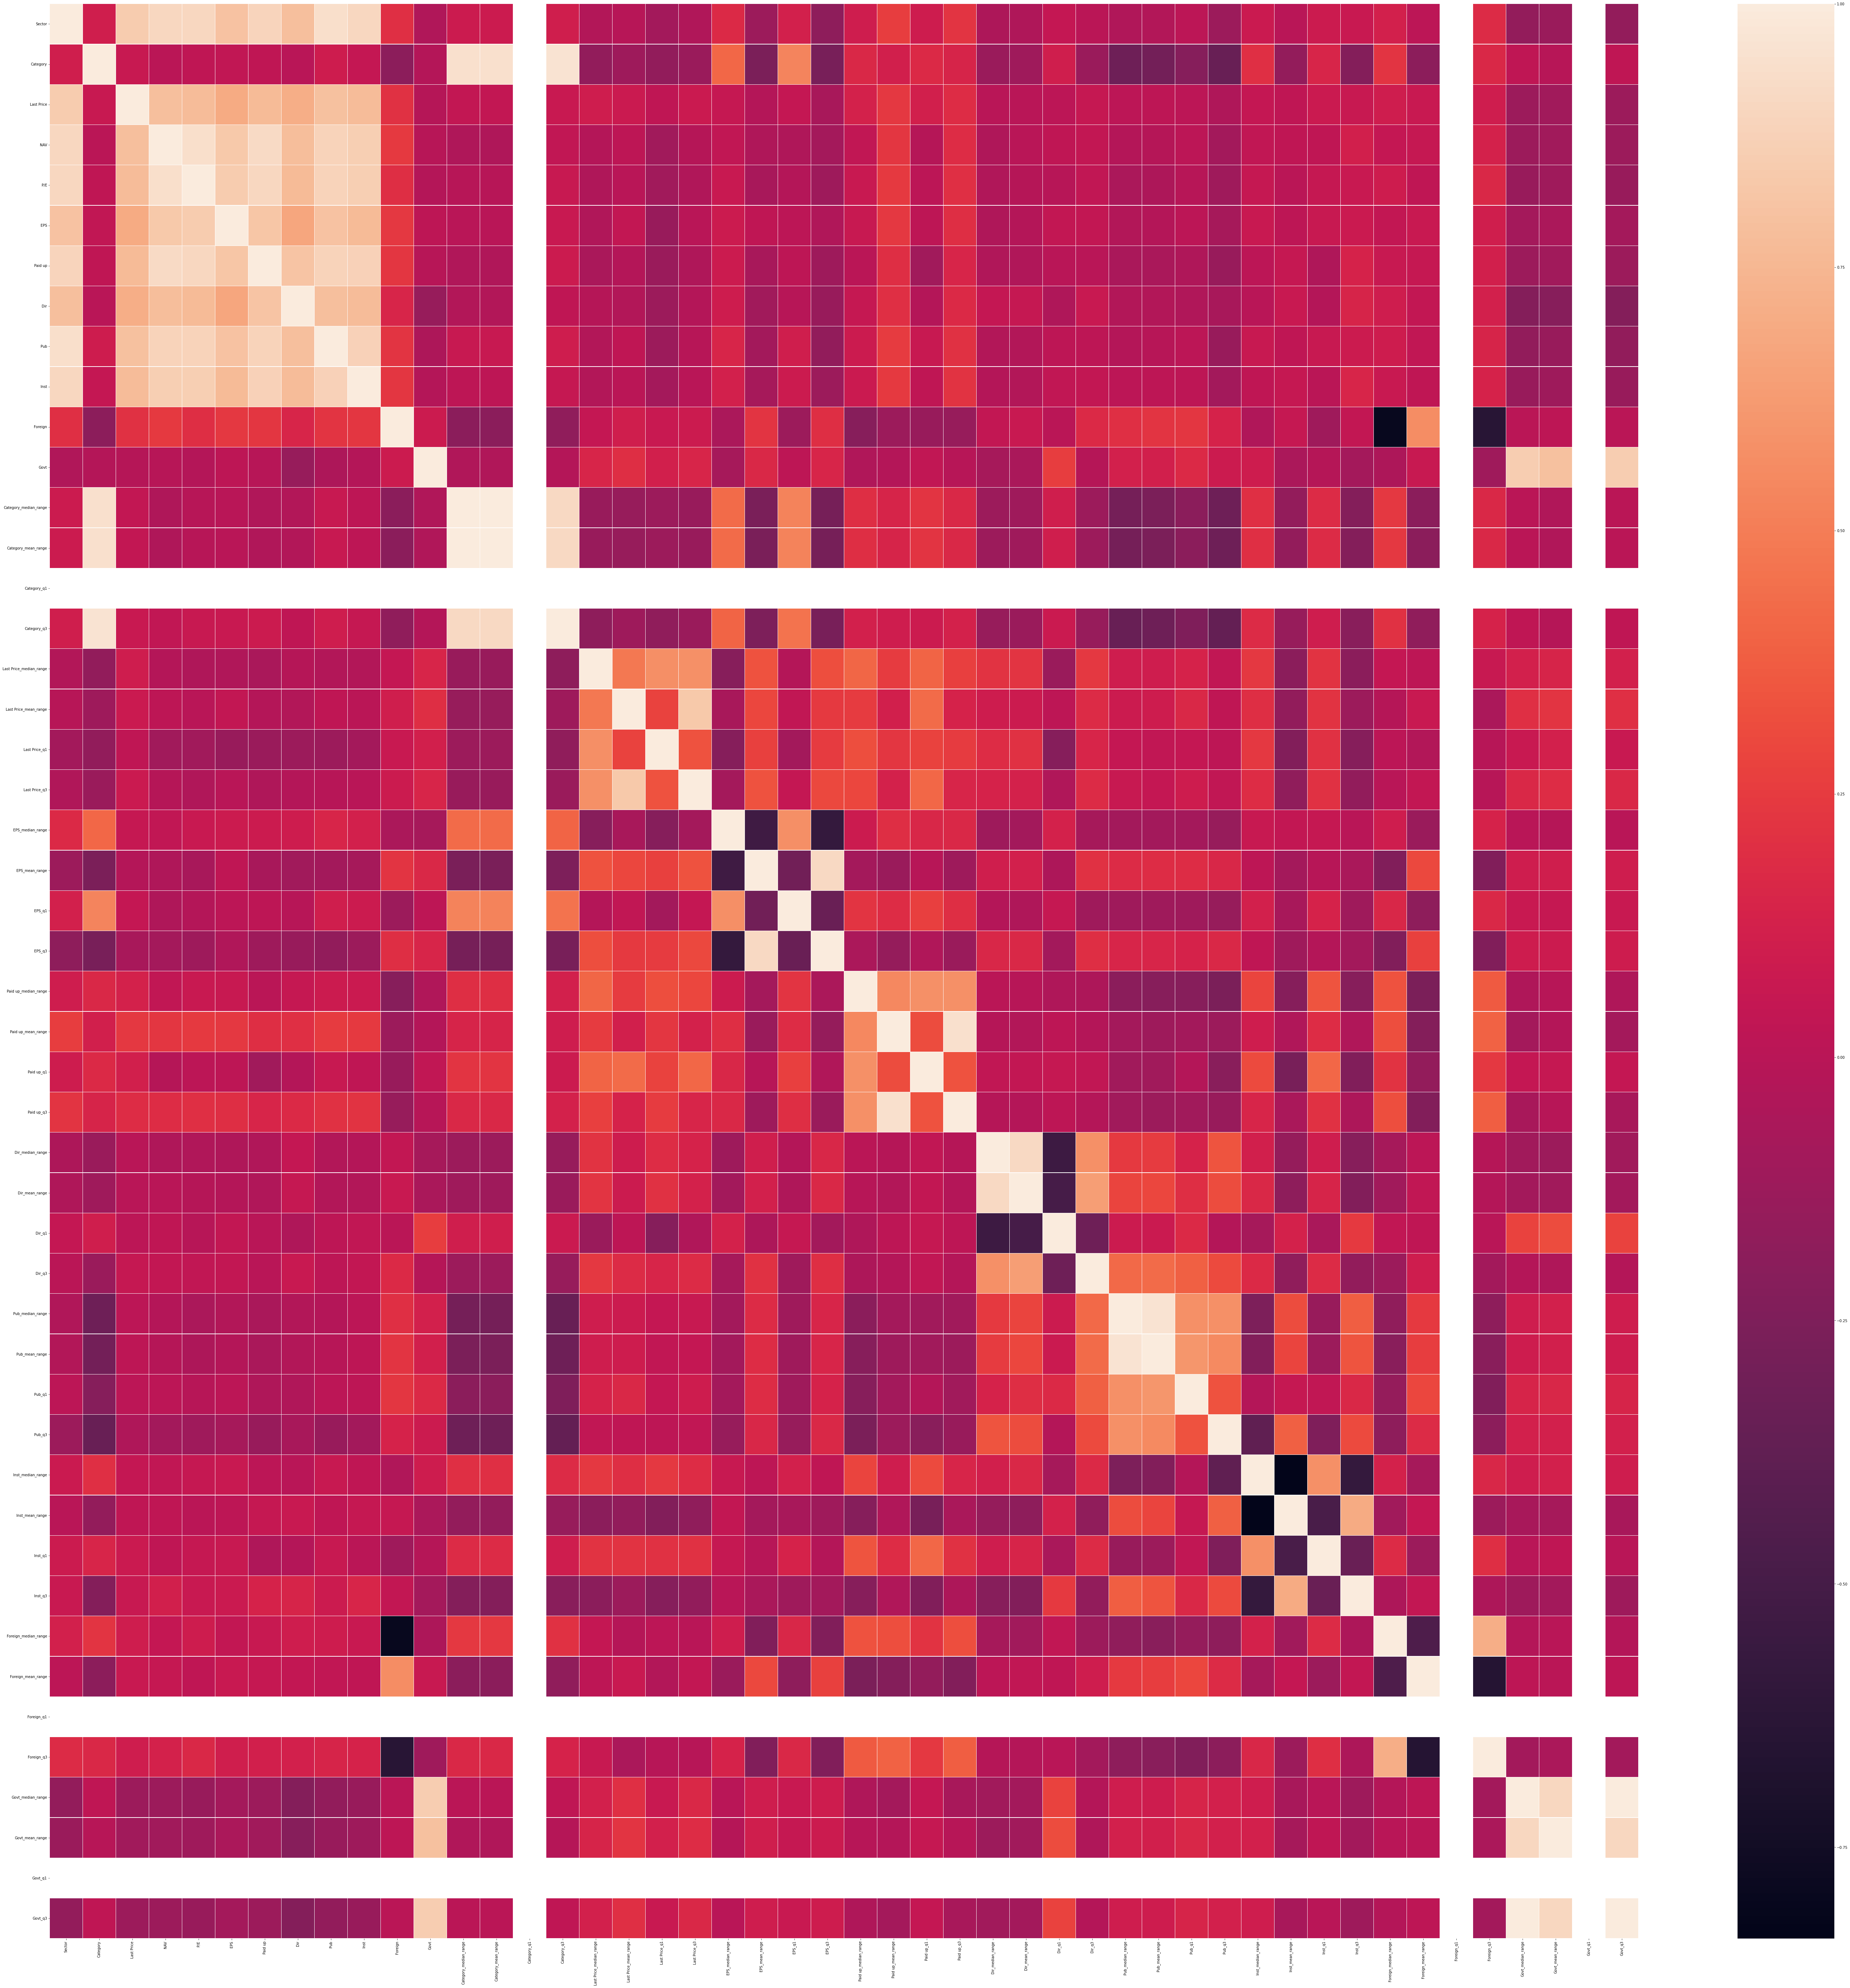

In [ ]:
#visualize the features for corelation too much attribute cannot predict
plt.figure(figsize=(100, 100))
corr = X.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2)

In [ ]:
#now do the listing for Real Price Paid (Our Target)
corr['Last Price'].sort_values(ascending= False)

Last Price                 1.000000
Sector                     0.848973
Pub                        0.797399
NAV                        0.787846
Inst                       0.773579
P/E                        0.771892
Paid up                    0.763313
Dir                        0.708538
EPS                        0.694362
Paid up_mean_range         0.233887
Foreign                    0.204532
Paid up_q3                 0.187575
Paid up_median_range       0.129664
Paid up_q1                 0.116531
Foreign_q3                 0.102109
Foreign_median_range       0.100534
Last Price_median_range    0.100088
Last Price_mean_range      0.081602
Inst_q1                    0.076785
Last Price_q3              0.075760
Category_q3                0.072957
Foreign_mean_range         0.071479
Category                   0.065298
Inst_q3                    0.063058
Dir_q3                     0.060053
EPS_median_range           0.055913
Inst_median_range          0.049324
EPS_q1                     0

In [ ]:
#need to keep the importance features by giving a threshold which has maximum accuraccy for prediction
cor_target = abs(corr['Last Price'])
relevant_features = cor_target[cor_target> 0.4]
relevant_features.sort_values(ascending= False)

Last Price    1.000000
Sector        0.848973
Pub           0.797399
NAV           0.787846
Inst          0.773579
P/E           0.771892
Paid up       0.763313
Dir           0.708538
EPS           0.694362
Name: Last Price, dtype: float64

In [ ]:
#count the features for prediction
relevant_features.count()

9

In [ ]:
#convert it to list for push into dataframe
features = relevant_features.index.tolist()

In [ ]:
features

['Sector', 'Last Price', 'NAV', 'P/E', 'EPS', 'Paid up', 'Dir', 'Pub', 'Inst']

In [ ]:
#splitting into train and test set
X_train,X_test,y_train,y_test=train_test_split(X_proccesed,y_processed, stratify = y_processed,test_size=0.2,random_state=102)

In [ ]:
#splitting into train and valid set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=102)

In [ ]:
#define params for XGBoost
params = {
        'objective':'multi:softmax',
        'n_estimators': 1000,
        'booster':'gbtree',
        'max_depth':5,
        'eval_metric':'mlogloss',
        'learning_rate':0.01, 
        'min_child_weight':2,
        'subsample':0.7,
        'colsample_bytree':0.8,
        'seed':45,
        'reg_alpha':1,
        'gamma':0,
        'nthread':-1,
        'num_class': 4

}

In [ ]:
#do the prediction and tune the hyperparameter for it's best
d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid)
d_test = xgb.DMatrix(X_test)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100, maximize=False, verbose_eval=10)

p_test = clf.predict(d_test)

[0]	train-mlogloss:1.36817	valid-mlogloss:1.3682
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't improved in 100 rounds.
[10]	train-mlogloss:1.2053	valid-mlogloss:1.20631
[20]	train-mlogloss:1.07013	valid-mlogloss:1.07319
[30]	train-mlogloss:0.957433	valid-mlogloss:0.962391
[40]	train-mlogloss:0.858131	valid-mlogloss:0.86434
[50]	train-mlogloss:0.772234	valid-mlogloss:0.779387
[60]	train-mlogloss:0.697677	valid-mlogloss:0.705314
[70]	train-mlogloss:0.63109	valid-mlogloss:0.639077
[80]	train-mlogloss:0.572137	valid-mlogloss:0.580057
[90]	train-mlogloss:0.519641	valid-mlogloss:0.527228
[100]	train-mlogloss:0.473244	valid-mlogloss:0.48053
[110]	train-mlogloss:0.431541	valid-mlogloss:0.438581
[120]	train-mlogloss:0.394848	valid-mlogloss:0.402011
[130]	train-mlogloss:0.360932	valid-mlogloss:0.367896
[140]	train-mlogloss:0.330591	valid-mlogloss:0.337391
[150]	train-mlogloss:0.302865	valid-mlogloss:0.309311
[160

In [ ]:
accuracy_score(y_test, p_test)

1.0

In [ ]:
precision_recall_fscore_support(y_test, p_test, average= "weighted")

(1.0, 1.0, 1.0, None)

In [ ]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []

    for line in lines[2 : (len(lines) - 4)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
plotMat: [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]
support: [54, 3, 12, 6]


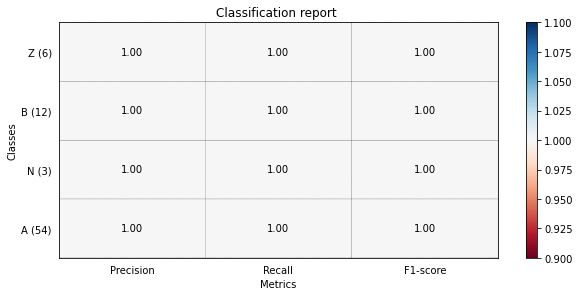

In [ ]:
target_names = ['A','N','B','Z']
report = classification_report(y_test, p_test,digits=4, target_names = target_names)
plot_classification_report(report)